# Método de Black-Scholes

## Fabián Rubilar A
### 201510509-K

In [1]:
#Importamos librerias 
from scipy.stats import norm
import numpy as np
import math
import cmath
from matplotlib.pyplot import *

#### Notación importante

$\bullet$ S(t): El precio del activo subyacente en el momento t.

$\bullet$ V(S,t): El precio de la opción en función del activo subyacente S, en el momento t.

$\bullet$ C(S,t)=$C_{call}$: El precio de una opción de compra europea.

$\bullet$ P(S,t)=$P_{put}$: El precio de una opción de venta europea.

$\bullet$ K: El precio de ejercicio de la opción, también conocido como precio de ejercicio.

$\bullet$ r: La tasa de interés libre de riesgo anualizada, compuesta continuamente También conocida como la fuerza del interés.

$\bullet$ $\mu$: El cambio del valor S, anualizada.

$\bullet$ $\sigma$: La desviación estándar de los rendimientos de las acciones; esta es la raíz cuadrada de la variación cuadrática del proceso de precio logarítmico de la acción - Volatilidad.

$\bullet$ t: Tiempo en años; generalmente se usa $t_{1}=0$ y $t_{2}=T$.


## Relación de las opciones de Call/Put

Primero, vamos a definir ciertas funciones para facilitar los cálculos

In [2]:
def d1_calc(S, K, r, vol, T, t):
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))

def BS_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K, r, vol, T, t):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

def Payoff_value(CallPutFlag,S,K):
    option = 1 if CallPutFlag is 'call' else -1
    return max(option*(S-K), 0)

Primero veamos una relación gráfica entre las opciones de Call/Put

C:\Users\elele\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


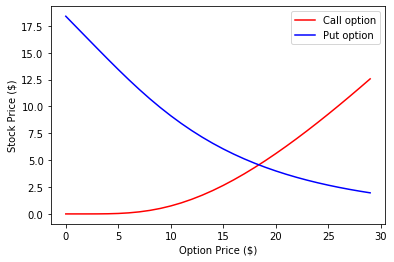

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

S = np.arange(0, 30)
vals_call = [BS_call(x, 50, 0.10, 0.2, 10, 0) for x in S]
vals_put = [BS_put(x, 50, 0.10, 0.2, 10, 0) for x in S]
plt.plot(S,vals_call, 'r', label = "Call option")
plt.plot(S, vals_put, 'b', label  = "Put option")
plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
plt.show()

Ahora, en forma particular, veamos cada opción por separado

### $\bullet$ Call option 

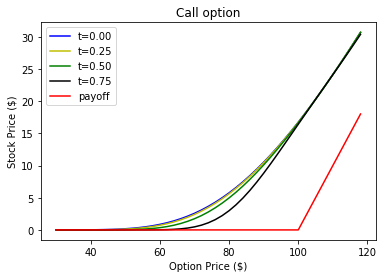

In [8]:
S = np.arange(30,120,2)
#vals_put_0 = [BS_put(x, 50, 0.10, 0.2, 1, 1) for x in S]
vals_call_1 = [BS_call(x, 100, 0.1, 0.3, 1, 0) for x in S]
vals_call_2 = [BS_call(x, 100, 0.1, 0.3, 1, 0.25) for x in S]
vals_call_3 = [BS_call(x, 100, 0.1, 0.3, 1, 0.50) for x in S]
vals_call_4 = [BS_call(x, 100, 0.1, 0.3, 1, 0.75) for x in S]
Payoff = [Payoff_value('call', x, 100) for x in S]
#plt.plot(S, vals_put_1, 'r', label  = "payoff")
plt.plot(S, vals_call_1, 'b', label  = "t=0.00")
plt.plot(S, vals_call_2, 'y', label  = "t=0.25")
plt.plot(S, vals_call_3, 'g', label  = "t=0.50")
plt.plot(S, vals_call_4, 'black', label  = "t=0.75")
#plt.plot(S, Ex, 'r', label  = "payoff")
plot(S, Payoff, 'r-', label="payoff")
plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
title("Call option")
plt.show()

### $\bullet$ Put option 

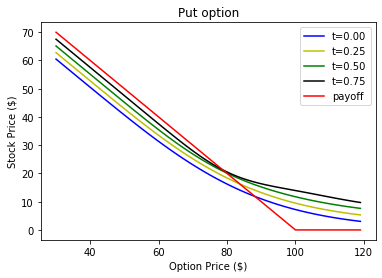

In [9]:
S = np.arange(30,120,1)
#vals_put_0 = [BS_put(x, 50, 0.10, 0.2, 1, 1) for x in S]
vals_put_1 = [BS_put(x, 100, 0.1, 0.3, 1, 0) for x in S]
vals_put_2 = [BS_put(x, 100, 0.1, 0.3, 1, 0.25) for x in S]
vals_put_3 = [BS_put(x, 100, 0.1, 0.3, 1, 0.50) for x in S]
vals_put_4 = [BS_put(x, 100, 0.1, 0.3, 1, 0.75) for x in S]
Payoff = [Payoff_value('put', x, 100) for x in S]
#plt.plot(S, vals_put_1, 'r', label  = "payoff")
plt.plot(S, vals_put_1, 'b', label  = "t=0.00")
plt.plot(S, vals_put_2, 'y', label  = "t=0.25")
plt.plot(S, vals_put_3, 'g', label  = "t=0.50")
plt.plot(S, vals_put_4, 'black', label  = "t=0.75")
#plt.plot(S, Ex, 'r', label  = "payoff")
plot(S, Payoff, 'r-', label="payoff")
plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
title("Put option")
plt.show()

## Problemas de la volatilidad

Aveces la volatilidad $\sigma$ no se conoce, por lo tanto, hay que trabajar con la volatilidad implícita. Para esto, es necesario recurrir al método de Newton.

In [10]:
from math import log, exp, sqrt
from scipy import stats

#Se define la distribución normal con su cdf respectivo.
N=stats.norm.cdf

#### 1) Call option

In [11]:
def BS_call_option(S0, K, T, r, sigma):
    S0=float(S0)
    d_1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d_2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    value=(S0*N(d_1)-K*exp(-r*T)*N(d_2))
    return value

In [12]:
#Definimos la función Vega, que es la derivada con respecto a sigma, y con esto, podemos calcular una volatilidad implícita.

def Vega(S0,K,T,r,sigma):
    S0=float(S0)
    d_1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    vega=S0*N(d_1)*sqrt(T)
    return vega

In [13]:
def volatilidad_implicita_call(S0,K,T,r,C0,sigma_est,it=100):
    for i in range(it):
        sigma_est -= ((BS_call_option(S0,K,T,r,sigma_est)-C0)/Vega(S0,K,T,r,sigma_est))
    return sigma_est

In [14]:
#Tomamos ciertos parámetros arbitrarios

S0=34
K=34
T=1 
r=0.0001
C0=2.7240 #Precio
sigma_inicial=0.5

In [15]:
volatilidad_implicita_call(S0,K,T,r,C0,sigma_inicial)

0.20104793239149896

In [16]:
#La volatilidad tiene relación directa con el tiempo en años utilizado, por lo tanto, la volatilidad está anualizada.
#Ahora, si el precio K baja, la volatilidad en call_option debería bajar y en put_option debería subir. Esto lo veremos 
#a continuación:

S0=34
K=32
T=1 
r=0.0001
C0=2.7240
sigma_inicial=0.5

In [17]:
volatilidad_implicita_call(S0,K,T,r,C0,sigma_inicial)

0.11530199476489017

#### 2) Put option

In [18]:
def BS_put_option(S0, K, T, r, sigma):
    S0=float(S0)
    d_1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d_2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    value=(-S0*N(-d_1)+K*exp(-r*T)*N(-d_2))
    return value

##### Nota: Usaremos la misma función "Vega" de call option.

In [19]:
def volatilidad_implicita_put(S0,K,T,r,P0,sigma_est,it=100):
    for i in range(it):
        sigma_est -= ((BS_put_option(S0,K,T,r,sigma_est)-P0)/Vega(S0,K,T,r,sigma_est))
    return sigma_est

In [20]:
#Tomamos ciertos parámetros arbitrarios

S0=34
K=34
T=1 
r=0.0001
P0=2.7240 
sigma_inicial=0.5

In [21]:
volatilidad_implicita_put(S0,K,T,r,P0,sigma_inicial)

0.20129986653323484

In [22]:
#Como antes, veamos que pasa con la volatilidad si se baja el precio K

S0=34
K=32
T=1 
r=0.0001
P0=2.7240 
sigma_inicial=0.5

In [23]:
volatilidad_implicita_put(S0,K,T,r,P0,sigma_inicial)

0.2773349362196553